In [1]:
import tensorflow as tf

**Installation**

In [2]:
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU available: {tf.config.list_physical_devices('GPU')}")

TensorFlow version: 2.19.1
GPU available: []


**Sequential API**
- Simple linear stack of layers - easiest way to build models.

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [4]:
# Sequential model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,), name='hidden1'),
    layers.Dropout(0.2, name='dropout1'),
    layers.Dense(64, activation='relu', name='hidden2'),
    layers.Dropout(0.2, name='dropout2'),
    layers.Dense(10, activation='softmax', name='output')
])

# Compaile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model summary
model.summary()

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

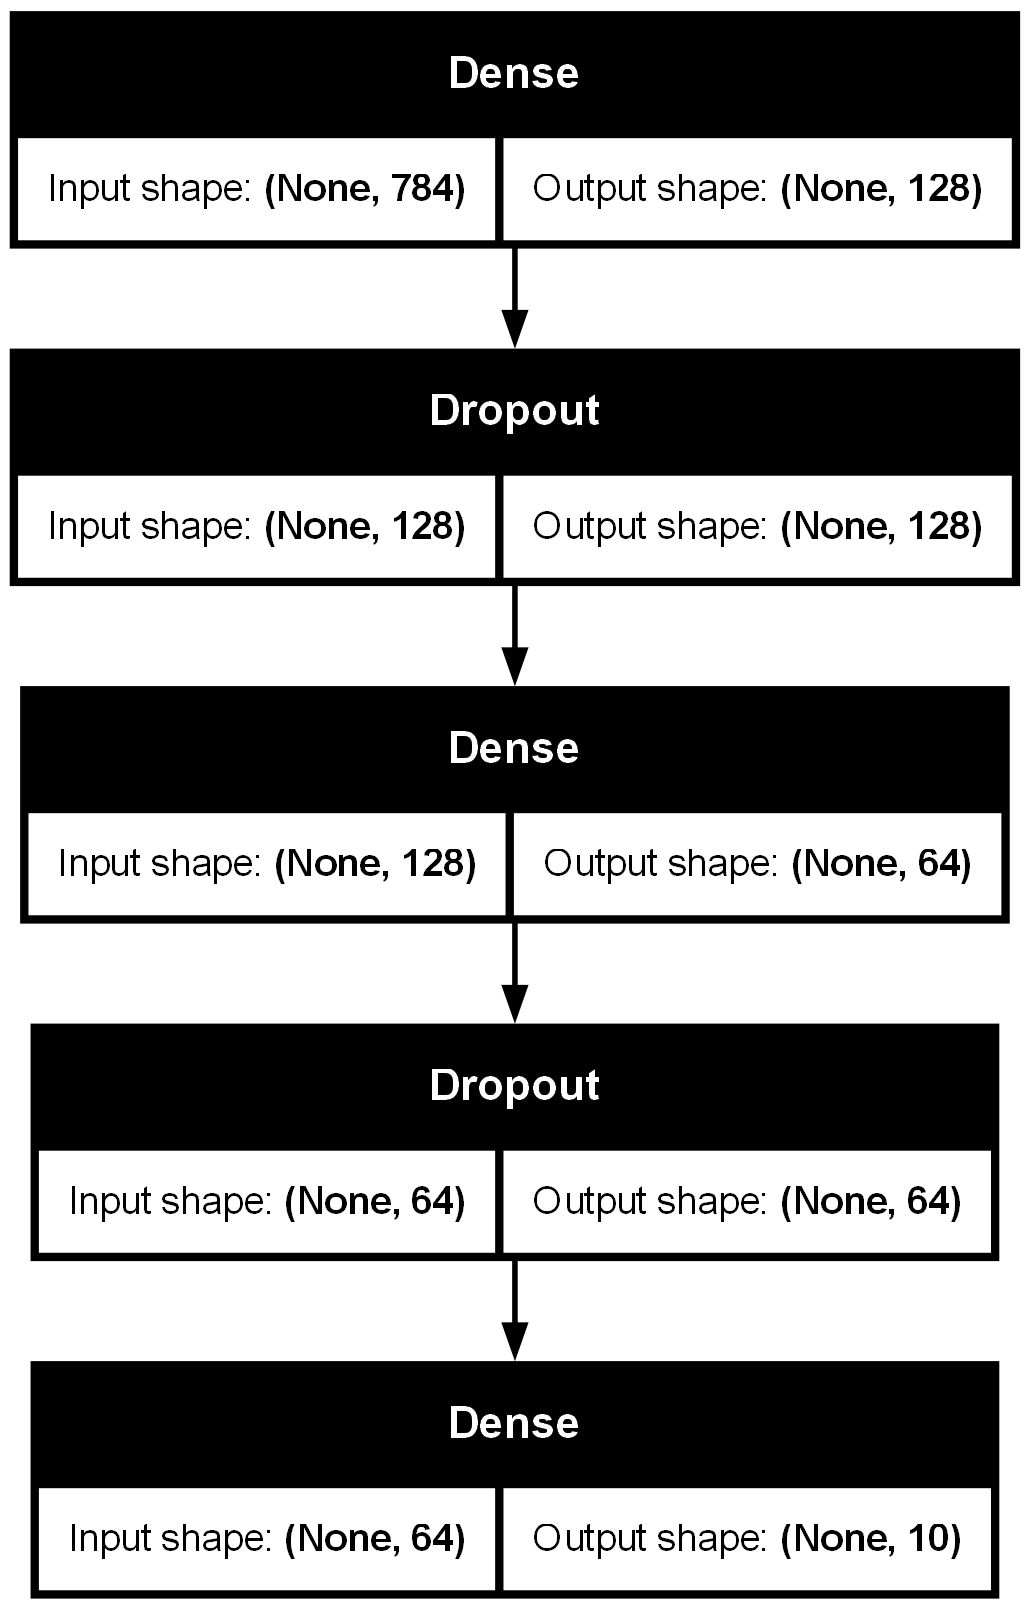

In [ ]:
# Visualize model architecture
keras.utils.plot_model(model, show_shapes=True)

**Functional API**
- More flexible - supports complex architectures (multi-input, multi-output, shared layers).

In [7]:
inputs = keras.Input(shape=(784,), name='input')
x = layers.Dense(128, activation='relu', name='hidden1')(inputs)
x = layers.Dropout(0.2, name='dropout1')(x)
x = layers.Dense(64, activation='relu', name='hidden2')(x)
x = layers.Dropout(0.2, name='dropout2')(x)
outputs = layers.Dense(10, activation='softmax', name='output')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='mlp_model')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

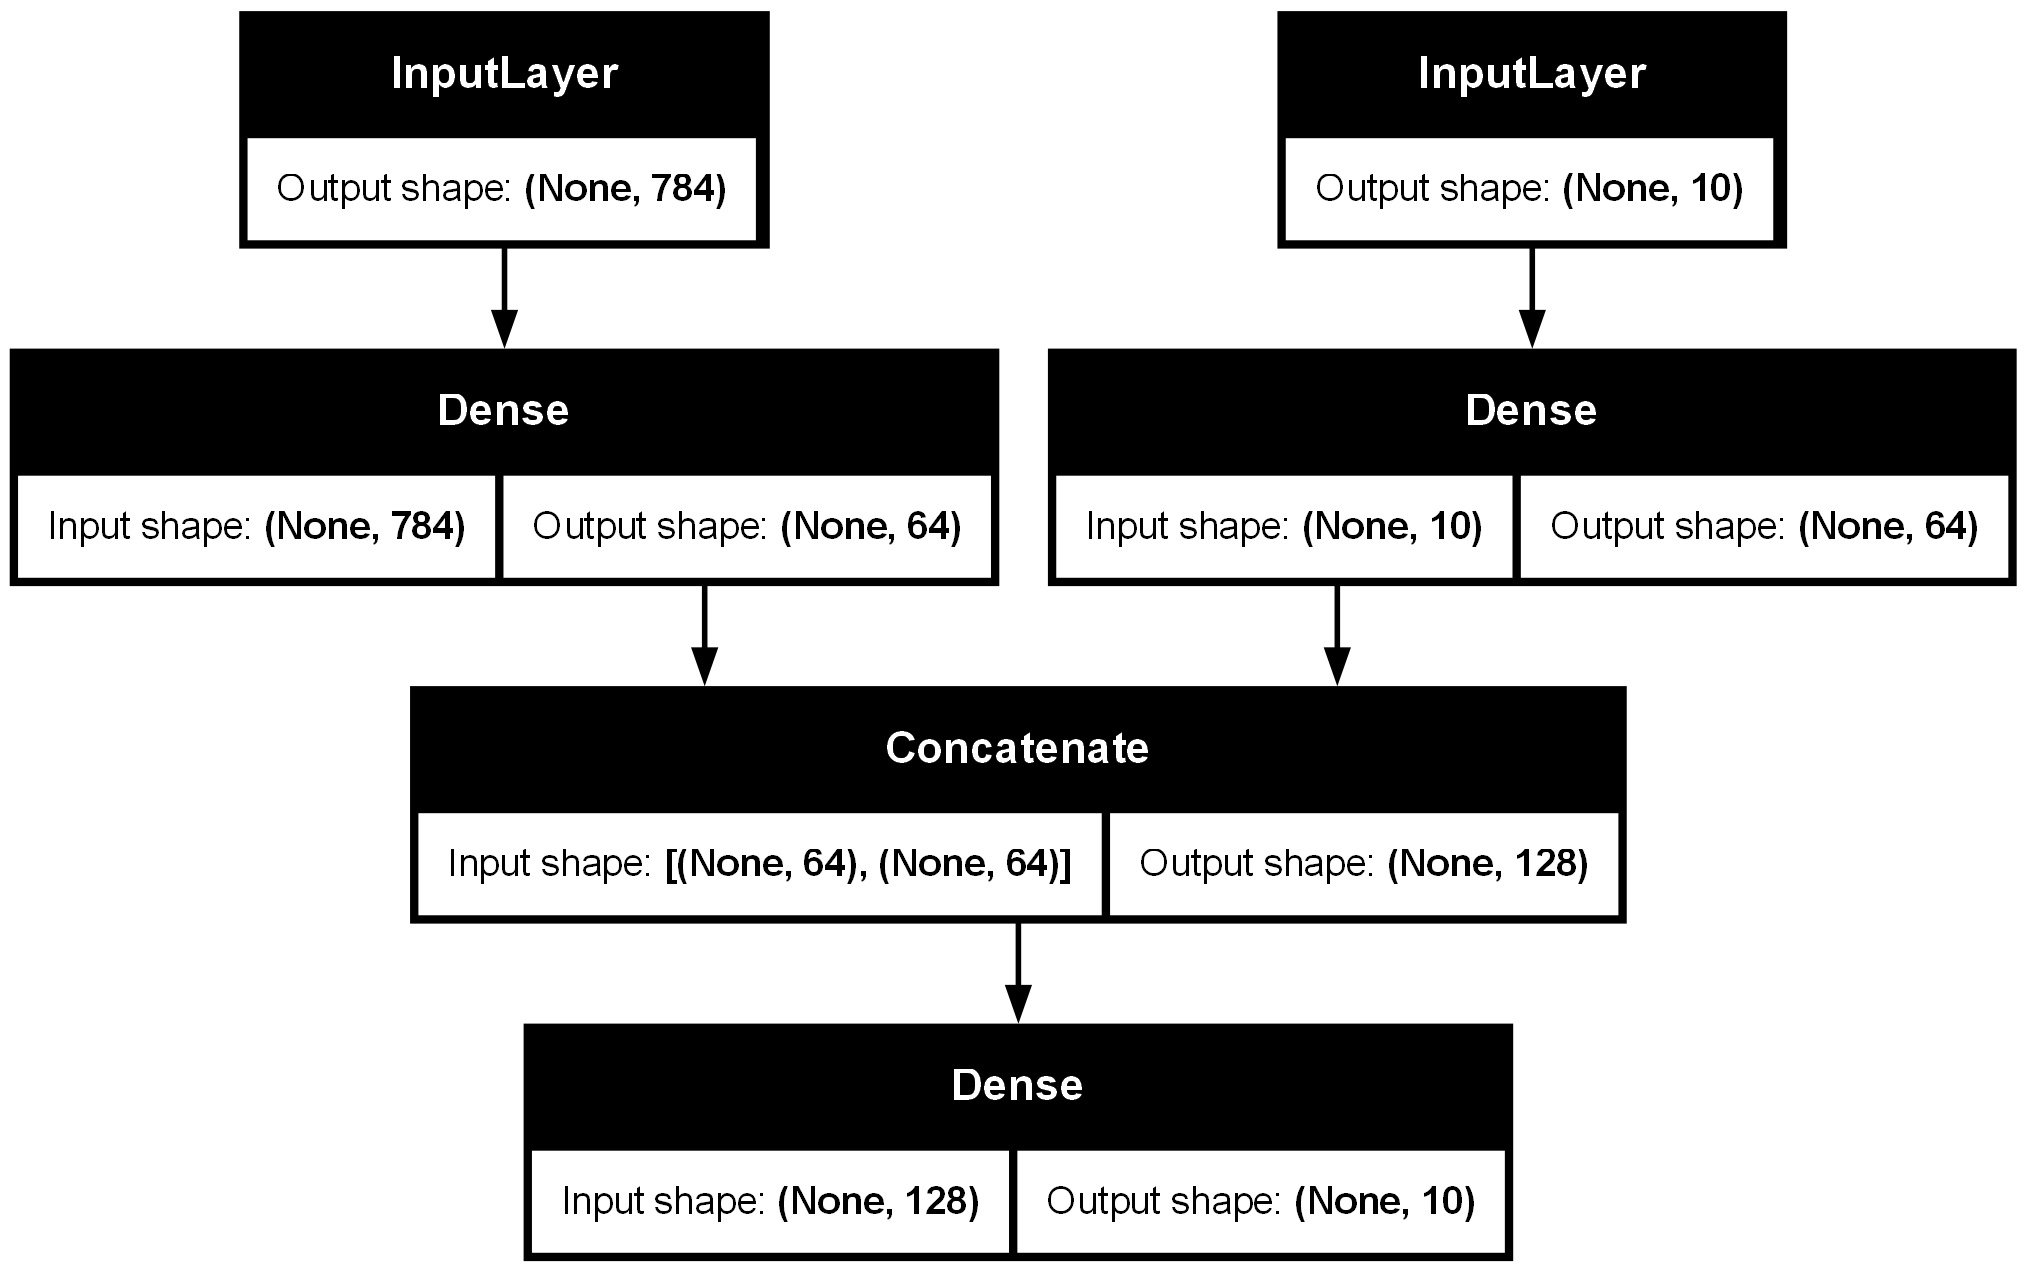

In [8]:
# Multi-input example
input1 = keras.Input(shape=(784,), name='input1')
input2 = keras.Input(shape=(10,), name='input2')
x1 = layers.Dense(64, activation='relu')(input1)
x2 = layers.Dense(64, activation='relu')(input2)
merged = layers.concatenate([x1, x2])
outputs = layers.Dense(10, activation='softmax')(merged)

multi_input_model = keras.Model(inputs=[input1, input2], outputs=outputs)

multi_input_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Visualize model architecture
keras.utils.plot_model(multi_input_model, show_shapes=True)